In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import tensorflow.keras.layers as L
from matplotlib import pyplot as plt
from PIL import Image as img

import os

from os import listdir
from os.path import isfile, join

from IPython import display

from stylegan2 import StyleGAN2

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
print("tensorflow version: ", tf.version.VERSION)
print("numpy version: ", np.__version__)

tensorflow version:  2.2.0
numpy version:  1.19.2


<b>Modify this block to create your data loader:</b>

In [3]:
class DataLoader():
    def __init__(self, image_size, batch_size, source_folder = 'E:\\test\StyleGAN2\\data\\GeneralPeople\\'):
        self.batch_size = batch_size
        self.image_size = image_size
        self.dataset = source_folder
        self.images = list(os.listdir(self.dataset))
        print("Number of images in the dataset:", len(self.images))
        
    def get_batch(self):
        batch = np.zeros((self.batch_size, self.image_size, self.image_size, 3), dtype = np.float32)
        for b in range(self.batch_size):
            try:
                l = np.random.randint(len(self.images))
                im = img.open(self.dataset + self.images[l]).convert('RGB')
                h, w = im.size
                if h > 512:
                    ww = 0
                    hh = np.random.randint(h - 512)
                elif w > 512:
                    ww = np.random.randint(w - 512)
                    hh = 0
                else:
                    ww, hh = 0, 0
                if np.random.rand() > 0.5:
                    im = im.transpose(method=img.FLIP_LEFT_RIGHT)
                #im = im.crop((hh, ww, hh + 512, ww + 512))
                im = im.resize((self.image_size, self.image_size))
                im = np.array(im, dtype = np.float32)
                batch[b, :, :, :] = im[None, :self.image_size, :self.image_size, :] / 255.0
            except:
                print("Could not open image:", self.dataset + self.images[l])
        return batch

print(DataLoader)

<class '__main__.DataLoader'>


<b>Create an instance of StyleGan and give it your data loader:</b>

In [4]:
gan = StyleGAN2(image_size = 256, batch_size = 4, lr = 1e-5)
gan.data_loader = DataLoader(gan.image_size, gan.batch_size, source_folder = 'E:\\test\StyleGAN2\\data\\GeneralPeople\\')

Number of images in the dataset: 13061


<b>Load pre-trained weights if you want:</b>

In [5]:
gan.loadWeights(suffix = "_generalpeopleface")

<b>Ready to train!</b>

In [6]:
gan.train(101)

(-1.0, 10.0)

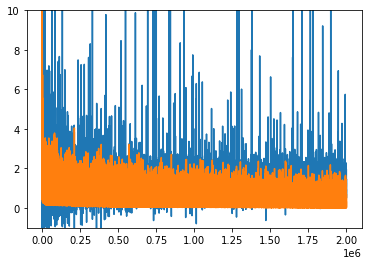

In [7]:
plt.plot(gan.history['G'])
plt.plot(gan.history['D'])
plt.ylim([-1,10])

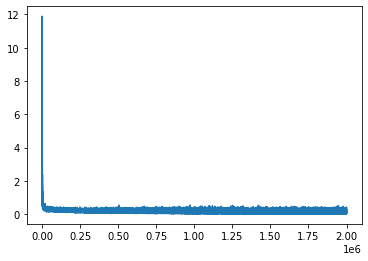

In [8]:
plt.plot(gan.history['R1'])

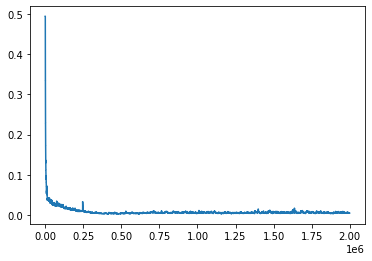

In [9]:
plt.plot(gan.history['pl'])

In [10]:
gan.saveWeights(suffix = "_generalpeopleface")

In [11]:
gan.step

2000101

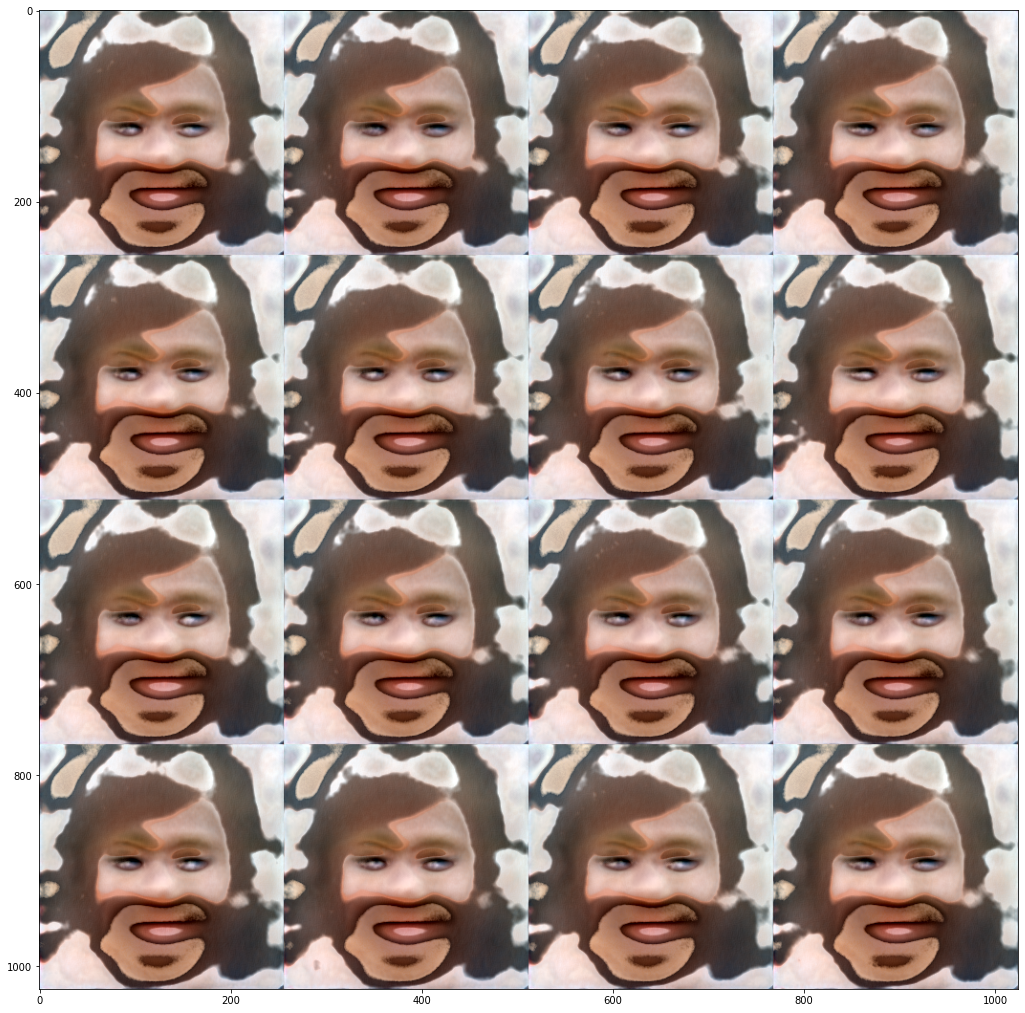

In [12]:
b = gan.batch_size
collage = np.zeros((256 * b, 256 * b, 3))
for i in range(b):
    data = np.clip(gan.generate().numpy(), 0, 1)
    data = np.reshape(data, (256 * b, 256, 3))
    collage[:, 256 * i: 256 * (i + 1), :] = data
plt.figure(figsize = (18, 18))
plt.imshow(collage)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


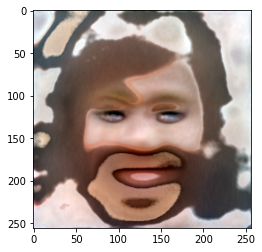

In [13]:
img = gan.generate().numpy()

for i in img:
    plt.imshow(i)